# Preprocessing the Data (Version 2)


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the csv
rawDF = pd.read_csv('MLdataB3.csv')
rawDF.head()

,state,brand,spend,impressions,leads,link_clicks,reach,agency
0,IL,B3,47.33,1780,0,7,1689,Agency 2
1,NY,B3,63.65,1857,1,10,1737,Agency 2
2,OK,B3,32.53,1718,0,7,1527,Agency 2
3,TN,B3,0.00,0,0,0,0,Agency 4
4,FL,B3,56.99,3251,9,42,3148,Agency 8


In [2]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33970 entries, 0 to 33969
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        33970 non-null  object 
 1   brand        33970 non-null  object 
 2   spend        33970 non-null  float64
 3   impressions  33970 non-null  int64  
 4   leads        33970 non-null  int64  
 5   link_clicks  33970 non-null  int64  
 6   reach        33970 non-null  int64  
 7   agency       33970 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.1+ MB


# Rough/Quick Preprocessing Complete

# Binning

In [3]:
# Determine the number of unique values in each column.
# if anything > 10, suggested to inspect further if non-numeric/string value column
rawDF.nunique()
# output shows potential need for binning on: 
# location_name, agency, date_start, campaign_id, state

state            25
brand             1
spend          7257
impressions    4335
leads            28
link_clicks     127
reach          4157
agency            6
dtype: int64

In [4]:
# Look at agency value counts for binning
agencyCnts = rawDF['agency'].value_counts()
agencyCnts

# It may be appropriate to EITHER: 
# 1. Bin Agencies 10-12 as "Other"
# OR 2. Focus on a couple of agencies against each other

Agency 3     18254
Agency 2      7836
Agency 8      4752
Agency 4      2696
Agency 6       431
Agency 12        1
Name: agency, dtype: int64

<AxesSubplot:ylabel='Density'>

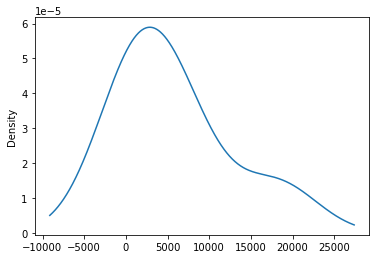

In [5]:
# Visualize the value counts of agencyCnts
agencyCnts.plot.density()

In [6]:
# groupby/left join agency
# value counts from agency

df = rawDF[['agency', 'impressions']]
df = df.groupby(by=['agency']).count()
df

,impressions
agency,
Agency 12,1
Agency 2,7836
Agency 3,18254
Agency 4,2696
Agency 6,431
Agency 8,4752


In [7]:
# merge 
# use concat? 
### ISSUE: other columns not showing up
merge_df2 = pd.merge(rawDF, df, on=['agency'])
merge_df2

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,impressions_y
0,IL,B3,47.33,1780,0,7,1689,Agency 2,7836
1,NY,B3,63.65,1857,1,10,1737,Agency 2,7836
2,OK,B3,32.53,1718,0,7,1527,Agency 2,7836
3,SC,B3,32.31,1725,1,14,1645,Agency 2,7836
4,CA,B3,101.13,3745,4,28,3513,Agency 2,7836
...,...,...,...,...,...,...,...,...,...
33965,CO,B3,10.16,376,2,6,355,Agency 6,431
33966,CT,B3,29.38,905,0,2,801,Agency 6,431
33967,CO,B3,20.12,663,1,2,608,Agency 6,431
33968,CO,B3,32.00,1396,1,8,1228,Agency 6,431


In [8]:
# Determine which values to replace if counts are less than ...?

bins = [0, 500, 1000, 5000, 10000]
labels =['1', '2', '3', '4']


merge_df2['Agency Tiers'] = pd.cut(merge_df2['impressions_y'], bins,labels=labels)
print (merge_df2)


      state brand   spend  impressions_x  leads  link_clicks  reach  \
0        IL    B3   47.33           1780      0            7   1689   
1        NY    B3   63.65           1857      1           10   1737   
2        OK    B3   32.53           1718      0            7   1527   
3        SC    B3   32.31           1725      1           14   1645   
4        CA    B3  101.13           3745      4           28   3513   
...     ...   ...     ...            ...    ...          ...    ...   
33965    CO    B3   10.16            376      2            6    355   
33966    CT    B3   29.38            905      0            2    801   
33967    CO    B3   20.12            663      1            2    608   
33968    CO    B3   32.00           1396      1            8   1228   
33969    GA    B3    2.79             69      0            1     69   

          agency  impressions_y Agency Tiers  
0       Agency 2           7836            4  
1       Agency 2           7836            4  
2     

In [9]:
# drop impressions y
merge_df2.drop('impressions_y', axis=1, inplace=True)
merge_df2.head()

,state,brand,spend,impressions_x,leads,link_clicks,reach,agency,Agency Tiers
0,IL,B3,47.33,1780,0,7,1689,Agency 2,4
1,NY,B3,63.65,1857,1,10,1737,Agency 2,4
2,OK,B3,32.53,1718,0,7,1527,Agency 2,4
3,SC,B3,32.31,1725,1,14,1645,Agency 2,4
4,CA,B3,101.13,3745,4,28,3513,Agency 2,4


In [10]:
df3 = merge_df2.rename(columns={'impressions_x': 'Impressions'})
df3

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
0,IL,B3,47.33,1780,0,7,1689,Agency 2,4
1,NY,B3,63.65,1857,1,10,1737,Agency 2,4
2,OK,B3,32.53,1718,0,7,1527,Agency 2,4
3,SC,B3,32.31,1725,1,14,1645,Agency 2,4
4,CA,B3,101.13,3745,4,28,3513,Agency 2,4
...,...,...,...,...,...,...,...,...,...
33965,CO,B3,10.16,376,2,6,355,Agency 6,1
33966,CT,B3,29.38,905,0,2,801,Agency 6,1
33967,CO,B3,20.12,663,1,2,608,Agency 6,1
33968,CO,B3,32.00,1396,1,8,1228,Agency 6,1


In [11]:
df3.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
26839,NJ,B3,31.97,1809,4,15,1764,Agency 3,NaN
1129,IL,B3,36.43,1650,1,27,1526,Agency 2,4
17366,TX,B3,0.00,0,0,0,0,Agency 3,NaN
14491,NY,B3,26.97,1098,6,18,1092,Agency 8,3
3924,CA,B3,49.14,1550,0,8,1367,Agency 2,4
26022,VA,B3,0.00,0,0,0,0,Agency 3,NaN
5627,OH,B3,31.21,1813,3,15,1700,Agency 2,4
13875,MD,B3,34.51,2242,1,36,2138,Agency 8,3
7250,CA,B3,32.36,1290,0,9,1248,Agency 2,4
27100,NJ,B3,31.16,1494,1,9,1414,Agency 3,NaN


In [12]:
# transform leads column from # of leads to binary, yes or no on a lead success 
# check non nulls
df3['leads'].notnull().astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
33965    1
33966    1
33967    1
33968    1
33969    1
Name: leads, Length: 33970, dtype: int32

In [13]:
df3['leads'].isnull().astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
33965    0
33966    0
33967    0
33968    0
33969    0
Name: leads, Length: 33970, dtype: int32

In [14]:
# change nulls == 0
df3.leads.fillna(0,inplace=True)

In [15]:
# change non nulls == 1 
df3["leads"]=df3["leads"].apply(lambda x: 1 if x!=0 else 0)

In [16]:
df3['leads'].sample(10)

22173    1
21658    0
27178    0
23591    0
22872    0
14740    1
14300    1
31055    1
7145     1
6903     0
Name: leads, dtype: int64

In [17]:
df4=df3.dropna(subset=['leads'])

In [18]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
16576,NC,B3,10.71,388,1,5,380,Agency 3,NaN
16619,VA,B3,0.00,0,0,0,0,Agency 3,NaN
1482,OH,B3,25.29,1336,0,10,1296,Agency 2,4
23143,TX,B3,0.00,0,0,0,0,Agency 3,NaN
5323,CA,B3,35.41,1552,1,15,1444,Agency 2,4
118,NY,B3,66.14,3399,1,23,3031,Agency 2,4
24093,TX,B3,24.13,1300,0,32,1229,Agency 3,NaN
24102,MO,B3,30.80,1605,0,6,1505,Agency 3,NaN
1238,IL,B3,24.43,703,1,6,548,Agency 2,4
23635,NC,B3,0.00,0,0,0,0,Agency 3,NaN


In [19]:
# export as csv
#df4.to_csv('ca_df_leads.csv')

### OptBinning for leads predict on bins for state

In [20]:
# use optbinning advanced binning
from optbinning import OptimalBinning as ob

In [21]:
variable = "leads"
x = df3['spend'].values
y = df3.leads

In [22]:
optb = ob(name=variable, dtype="numerical", solver="cp")

In [23]:
optb.fit(x, y)

OptimalBinning(name='leads')

In [24]:
binning_table = optb.binning_table

In [25]:
type(binning_table)

optbinning.binning.binning_statistics.BinningTable

In [26]:
binning_table.build()
### What does it mean: 
# Bin: the intervals delimited by the optimal split points.
# Count: the number of records for each bin.
# Count (%): the percentage of records for each bin.
# Non-event: the number of non-event records (y=0) for each bin.
# Event: the number of event records (y=1) for each bin.
# Event rate: the percentage of event records for each bin.
# WoE: the Weight-of-Evidence for each bin.
# IV: the Information Value (also known as Jeffrey’s divergence) for each bin.
# JS: the Jensen-Shannon divergence for each bin.

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.48)",3573,0.105181,3527,46,0.012874,4.909461,1.400582,0.094073
1,"[4.48, 11.78)",2138,0.062938,1478,660,0.308700,1.376105,0.123876,0.014368
2,"[11.78, 15.91)",2302,0.067766,1121,1181,0.513032,0.517759,0.019114,0.002363
3,"[15.91, 19.41)",2080,0.061230,863,1217,0.585096,0.22617,0.003219,0.000402
4,"[19.41, 24.05)",2556,0.075243,972,1584,0.619718,0.081547,0.000506,0.000063
5,"[24.05, 26.63)",1859,0.054725,589,1270,0.683163,-0.198446,0.002091,0.000261
6,"[26.63, 32.05)",4361,0.128378,1209,3152,0.722770,-0.388344,0.018155,0.002255
7,"[32.05, 34.22)",2695,0.079335,600,2095,0.777365,-0.680479,0.032432,0.003978
8,"[34.22, 41.43)",3619,0.106535,747,2872,0.793589,-0.776799,0.055535,0.006772
9,"[41.43, 50.43)",4125,0.121431,670,3455,0.837576,-1.0704,0.112002,0.013368


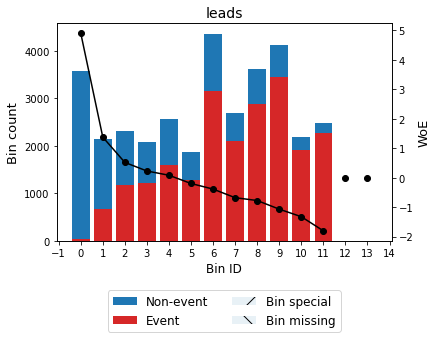

In [27]:
binning_table.plot(metric="woe")
# woe = inversely related to event rate, weight of evidence for each bin
# shows impression on y axis in thousands
# woe on right 
# bins on bottom 

### Binning check on all columns

In [28]:
# use scorecard advanced binning
# https://pypi.org/project/scorecardpy/
import scorecardpy as sc

In [29]:
bins = sc.woebin(df3, y="leads")

[INFO] creating woe binning ...


C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: brand)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [ ]:
# plot the bins
sc.woebin_plot(bins)
# need to reformat to read plots easily

### quick observation---Plots with highest IV value = most likley to predict successfully on leads
# state (.05), agency (.03), spend (.002) seem most promising

### Drop for split

In [30]:
df4.sample(10)

,state,brand,spend,Impressions,leads,link_clicks,reach,agency,Agency Tiers
15426,TX,B3,0.00,0,0,0,0,Agency 3,NaN
33965,CO,B3,10.16,376,1,6,355,Agency 6,1
19191,CA,B3,37.75,899,0,10,822,Agency 3,NaN
28539,CA,B3,72.31,2986,1,7,2603,Agency 3,NaN
7595,OH,B3,34.76,1669,1,9,1637,Agency 2,4
15265,CA,B3,34.20,1187,1,12,1163,Agency 8,3
17219,WA,B3,16.87,878,1,6,847,Agency 3,NaN
26469,NJ,B3,24.38,1191,0,8,1158,Agency 3,NaN
31139,VA,B3,11.99,480,1,8,444,Agency 3,NaN
27926,MI,B3,6.18,277,0,0,262,Agency 3,NaN


In [31]:
# check current df and keep only: 
# state tiers, agency tiers, spend, Impressions, brand
# target = leads
model_df1 = df4.drop(columns=['agency', 'brand'])

In [32]:
model_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33970 entries, 0 to 33969
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   state         33970 non-null  object  
 1   spend         33970 non-null  float64 
 2   Impressions   33970 non-null  int64   
 3   leads         33970 non-null  int64   
 4   link_clicks   33970 non-null  int64   
 5   reach         33970 non-null  int64   
 6   Agency Tiers  15716 non-null  category
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 1.8+ MB


In [34]:
model_df1.to_csv('b3_df_nonEncoded.csv')

### Encoding

In [35]:
# generagte cat variables
# Generate our categorical variable lists
application_cat = model_df1.dtypes[model_df1.dtypes == "object"].index.tolist()

In [36]:
# one hot encoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# create new df before merging later
encoded_df = pd.DataFrame(enc.fit_transform(model_df1[application_cat]))

# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names(application_cat)
encoded_df.head()

,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_IL,state_MA,state_MD,state_MI,...,state_NY,state_OH,state_OK,state_PA,state_SC,state_SD,state_TN,state_TX,state_VA,state_WA
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# merge dfs
model_df1_official = model_df1.merge(encoded_df, left_index=True, right_index=True)
model_df1_official = model_df1.drop(application_cat, 1)
model_df1_official.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,spend,Impressions,leads,link_clicks,reach,Agency Tiers
0,47.33,1780,0,7,1689,4
1,63.65,1857,1,10,1737,4
2,32.53,1718,0,7,1527,4
3,32.31,1725,1,14,1645,4
4,101.13,3745,1,28,3513,4


In [38]:
model_df1_official.to_csv('b2_df.csv')